# **Analisis de Datos de Marketing Bancario**
Francisco Jose Diaz. *Analista de Datos*.

El Salvador
> Este notebook es con fines didacticos para practicar estadistica con python.
Puede ver el dataset en [Kaggle: Bank Marketing](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing?datasetId=30368&searchQuery=imputation)

# **Indice**
- [Introduccion](#id1)
- [Valores perdidos](#id2)
- [Analisis exploratorio](#id3)
- [Estadistica inferencial](#id4)
- [Analisis PCA](#id5)
- [Modelos predictivos de regresion logistica](#id6)
- [Conclusion](#id7)

## **Introduccion**<a name="id1"></a>
Este cuaderno presenta un analisis detallado de los datos de una campaña de marketing de un banco. El objetivo es entender el perfil del cliente para predecir si un cliente se suscribira a un deposito a plazo o no, (variable y), estaría ('yes') o no ('no') suscrito. Para lograr este objetivo, se utilizan tecnicas de analisis exploratorio de datos, estadisticas descriptivas univariadas y bivariadas, tratamiento de valores faltantes, estadísticas inferenciales con intervalos de confianza y pruebas de hipotesis, analisis PCA y aprendizaje automatico utilizando regresion logística. El cuaderno esta organizado en secciones que presentan cada una de estas tecnicas en detalle y muestra como se aplican al conjunto de datos para obtener informacion valiosa y construir modelos predictivos precisos.

La estructura de los datos es la siguiente:

**Input variables**

| Variable | Description |
| --- | --- |
| age | (numeric) |
| job | type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") |
| Marital | marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed) |
| Education  | (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') |
| Default | has credit in default? (categorical: 'no', 'yes', 'unknown') |
| Housing | has housing loan? (categorical: 'no', 'yes', 'unknown') |
| Loan | has personal loan? (categorical: 'no', 'yes', 'unknown') |
| Contact | contact communication type (categorical: 'cellular','telephone') |
| Month | last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec') |
| Day_of_week | last contact day of the week (categorical: 'mon','tue','wed','thu','fri') |
| Duration | last contact duration, in seconds (numeric) |
| Campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| Pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
| Previous | number of contacts performed before this campaign and for this client (numeric) |
| Poutcome | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') |
| Emp.var.rate | employment variation rate - quarterly indicator (numeric) |
| Cons.price.idx | consumer price index - monthly indicator (numeric) |
| Cons.conf.idx | consumer confidence index - monthly indicator (numeric) |
| Euribor3m | euribor 3 month rate - daily indicator (numeric) |
| Nr.employed | Nr.employed: number of employees - quarterly indicator (numeric)
 |

**Target variable**

| Variable | Description |
| --- | --- |
| y | has the client subscribed a term deposit? (binary: "yes","no") |

In [ ]:
# Librerias
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos el dataset
df = pd.read_csv("./bank-additional-full.csv", sep=";")

# Viendo las primeras 5 filas de nuestro dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Conociendo las dimensiones de nuestro dataset
df.shape

# Filas = 41188 y Columnas = 21

(41188, 21)

##**Valores perdidos**<a name="id2"></a>
En esta seccion se describirá como se tratan los valores faltantes en el conjunto de datos. Los valores faltantes son comunes en muchos conjuntos de datos y pueden ocurrir por diversas razones, como errores en la recopilación de datos o falta de respuesta en una encuesta.

Es importante tratar los valores faltantes antes de proceder con el análisis, ya que pueden afectar el resultado del análisis y pueden requerir ser tratados de alguna manera.

De acuerdo a la fuente del dataset, hay varios valores faltantes en algunos atributos categóricos, todos codificados con la etiqueta "unknown". Por lo tanto se usara la tecnica de la eliminacion de registros con valores faltantes.


In [ ]:
df.replace(
'unknown', np.NaN, inplace=True)

Recuento de valores faltantes en cada columna del DataFrame: **df**

In [ ]:
round(pd.DataFrame({'Total': df.shape[0], 'Nulls Count': df.isnull().sum(),
                               'Nulls Percentage': df.isnull().sum() / df.shape[0] * 100}), 2)

,Total,Nulls Count,Nulls Percentage
age,41188,0,0.00
job,41188,330,0.80
marital,41188,80,0.19
education,41188,1731,4.20
default,41188,8597,20.87
housing,41188,990,2.40
loan,41188,990,2.40
contact,41188,0,0.00
month,41188,0,0.00
day_of_week,41188,0,0.00


In [ ]:
# Eliminamos todas las filas que contengan valores perdidos en cualquier columna
df = df.dropna()

# Las nuevas dimensiones de nuestro dataset
df.shape

# Filas = 30488 y Columnas = 21

(30488, 21)

## **Analisis exploratorio**<a name="id3"></a>
En la seccion de analisis exploratorio de datos, se presentaran estadisticas descriptivas univariadas y bivariadas para entender la distribucion y relacion entre las variables en el conjunto de datos.

In [ ]:
# Conociendo los tipos de datos de nuestro dataset
pd.DataFrame.info(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

### **Estadística univariada**
En la sección de estadística univariada, se presentarán estadísticas descriptivas para cada variable en el conjunto de datos por separado. La estadística univariada se utiliza para resumir y describir la información contenida en una sola variable. En esta sección, se calcularán medidas como la media, la mediana, la desviación estándar, entre otras para resumir la información.


In [ ]:
# Resumen de variables Numericas
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# Resumen de variables Categoricas
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8737,17492,10412,30485,16521,25720,20443,9733,6395,25836,26629


En las siguientes visualizaciones se utiliza el metodo de iteracion, por ejemplo si queremos crear un boxplot se utilizaria un codigo similar a este:
``` sns.boxplot(x=df["age"], flierprops={"marker": "+"}, medianprops={"color": "red"})```

Debido a la cantidad de variables del dataset, se decidio buscar la forma de iterar para facilitar el trabajo, es decir repetir varias veces el codigo para lograr las visualizaciones.

#### **Variables Numericas**
---
*   **Analisis de Histogramas**




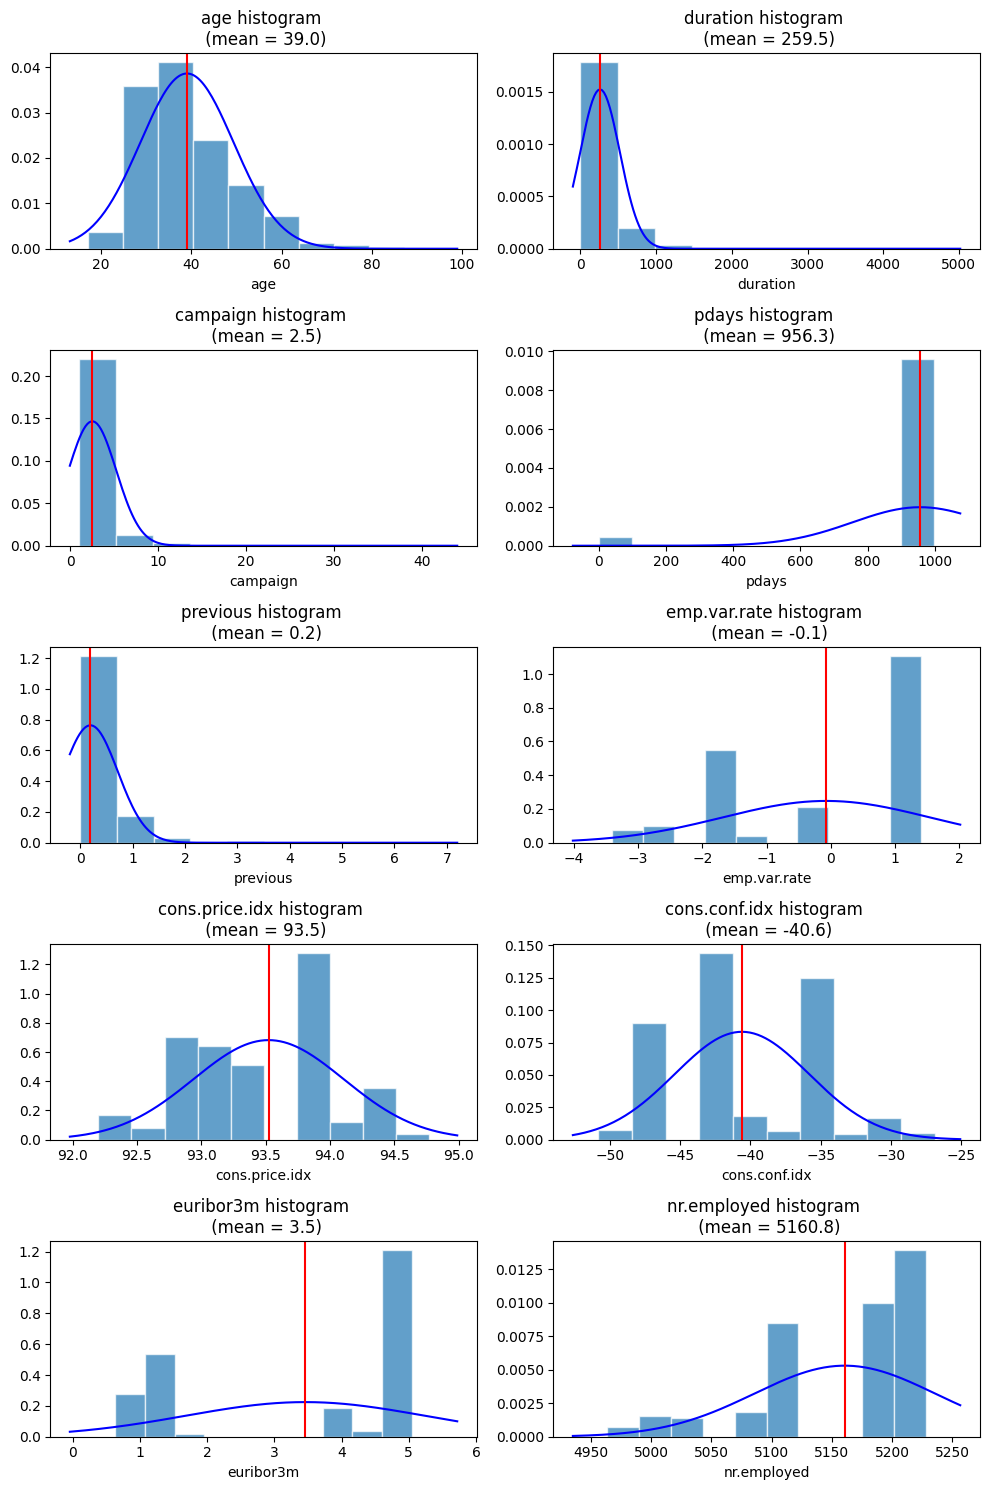

In [ ]:
columns = df.select_dtypes(include='number').columns # Selecciona solo las columnas numéricas
n = len(columns) # Calcula el número de columnas
ncols = 2 # Número de columnas en la cuadrícula de subtramas
nrows = 5 # Número de filas en la cuadrícula de subtramas

fig, axs = plt.subplots(nrows, ncols, figsize=(10, 15)) # Crea una figura y una cuadrícula de subtramas

for i, col in enumerate(columns): # Itera sobre cada columna
    row = i // ncols # Calcula el índice de fila para la subtrama actual
    col = i % ncols  # Calcula el índice de columna para la subtrama actual
    ax = sns.distplot(df[columns[i]], bins=10,  kde=False, fit=norm,   # Crea un histograma para la columna actual
                      hist_kws={'alpha': 0.7, 'edgecolor': 'white'}, fit_kws={'color': 'blue'}, ax=axs[row, col])
    ax.axvline(df[columns[i]].mean(), color='red') # Agrega una línea vertical en el valor medio
    title = f'{columns[i]} histogram \n (mean = {df[columns[i]].mean():.1f})'  # Crea un título para la subtrama actual
    ax.set_title(title) # Establece el título para la subtrama actual

plt.tight_layout() # Ajusta los parámetros de la subtrama para que encajen bien en la figura
plt.show()  # Muestra la figura

*   **Analisis Boxplots**



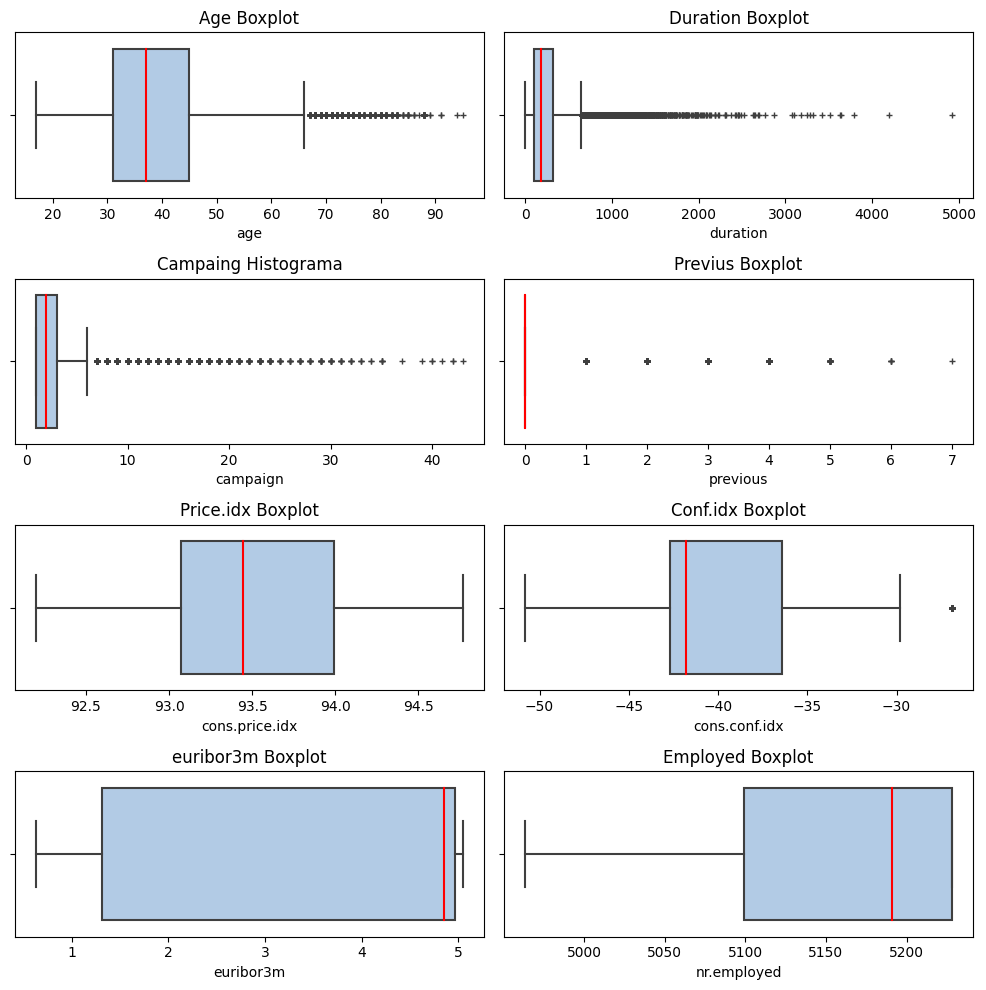

In [ ]:
columns = ["age", "duration", "campaign", "previous", "cons.price.idx",
           "cons.conf.idx", "euribor3m", "nr.employed"] # Define las columnas a graficar
titles = ['Age Boxplot', 'Duration Boxplot', 'Campaing Histograma', 'Previus Boxplot', 'Price.idx Boxplot',
          'Conf.idx Boxplot', "euribor3m Boxplot",  'Employed Boxplot'] # Define los títulos para cada subtrama

fig, axs = plt.subplots(4, 2, figsize=(10, 10)) # Crea una figura y una cuadrícula de subtramas

for i, (col, title) in enumerate(zip(columns, titles)): # Itera sobre cada columna y título
    row = i // 2  # Calcula el índice de fila para la subtrama actual
    col_index = i % 2  # Calcula el índice de columna para la subtrama actual
    ax = sns.boxplot(data=df, x=col, boxprops={"facecolor": (.4, .6, .8, .5)}, flierprops={"marker": "+"},
                     medianprops={"color": "red"}, ax=axs[row, col_index]) # Crea un boxplot
    ax.set_title(title) # Establece el título para la subtrama actual

plt.tight_layout() # Ajusta los parámetros de la subtrama para que encajen bien en la figura

plt.show() # Muestra la figura

#### **Variables Categoricas**
---
*   **Visualizaciones de Volumen**





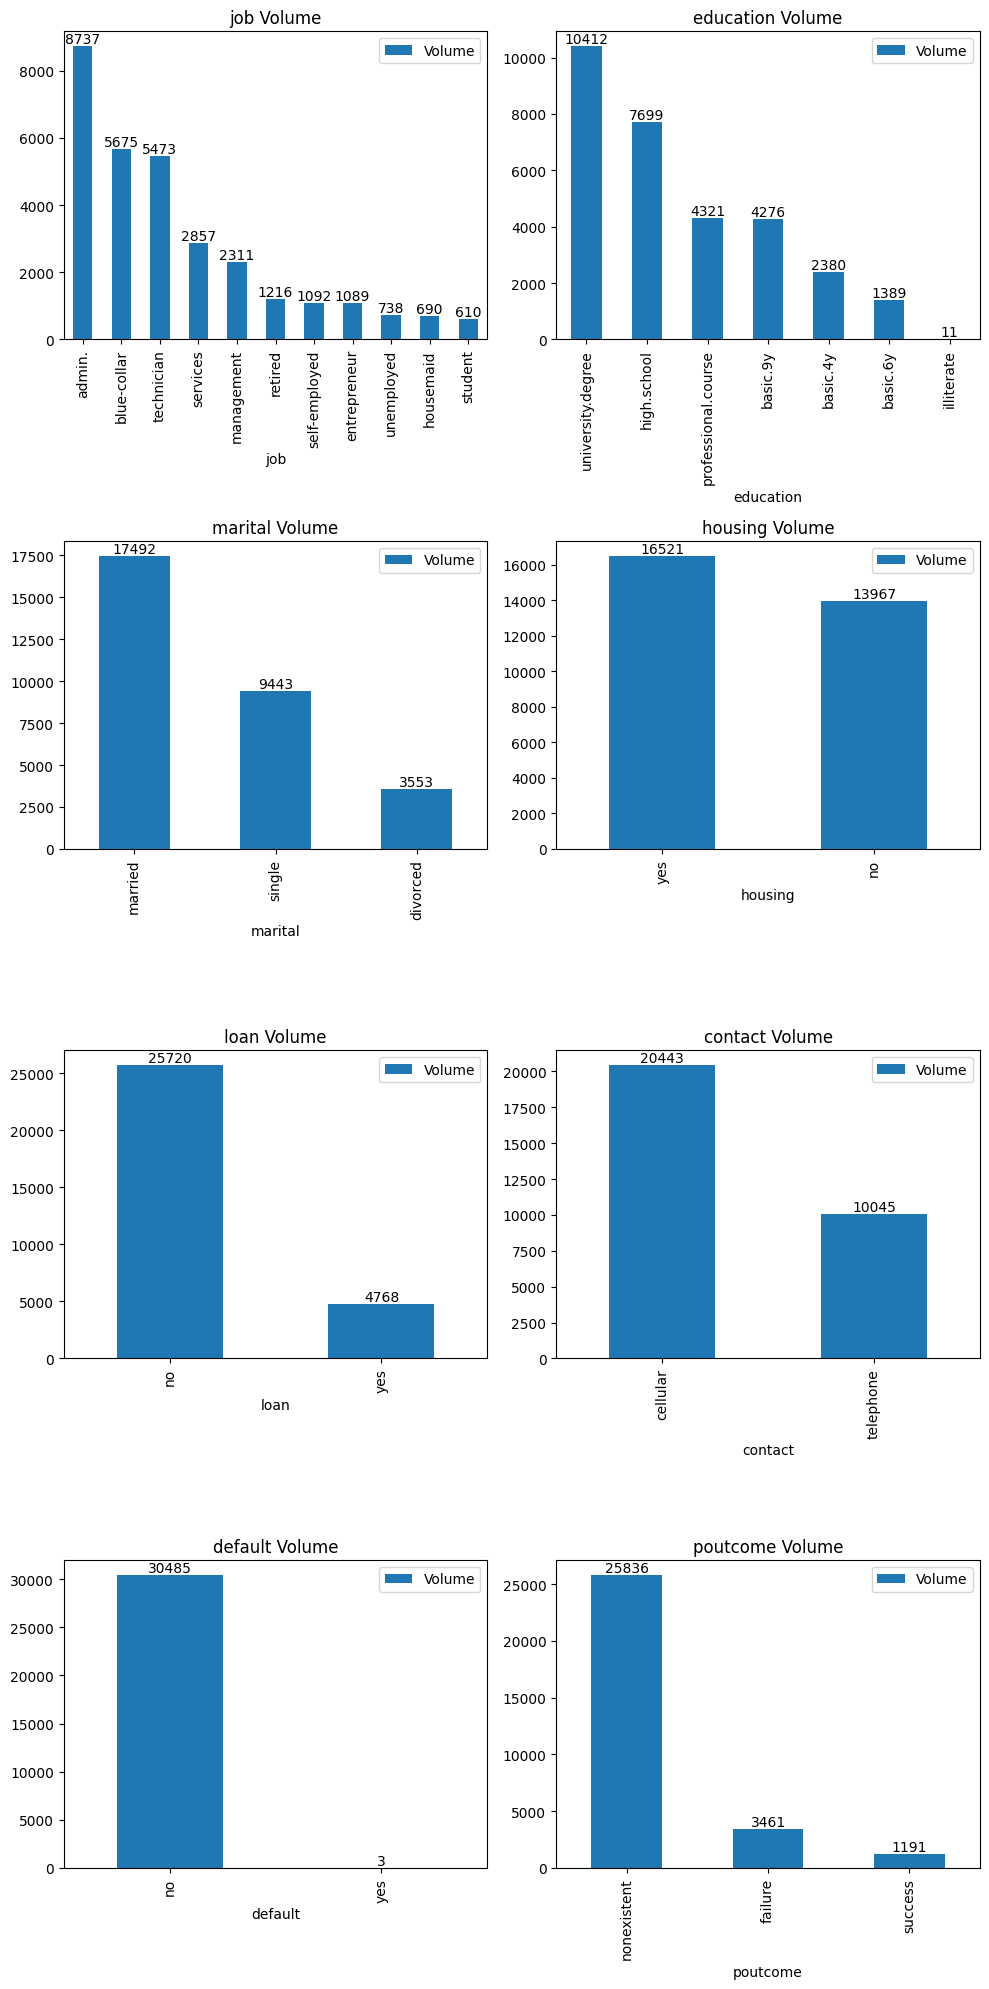

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20)) # Crea una figura y una cuadrícula de subtramas

columns = ["job", "education", "marital", "housing",
           "loan", "contact", "default", "poutcome"] # Define las columnas a graficar

for i, col in enumerate(columns): # Itera sobre cada columna
    counts = df[col].value_counts().reset_index() # Calcula el volumen de valores
    counts.columns = [col, 'Volume'] # Renombra las columnas del DataFrame resultante
    ax = counts.plot(x=col, y='Volume', kind='bar',
                     ax=axs[i//2, i%2], title=f'{col} Volume') # Crea un gráfico de barras
    ax.bar_label(ax.containers[0]) # Agrega etiquetas a las barras

plt.tight_layout() # Ajusta los parámetros de la subtrama para que encajen bien en la figura
plt.show() # Muestra la figura

*   **Visualizaciones de Frecuencia**



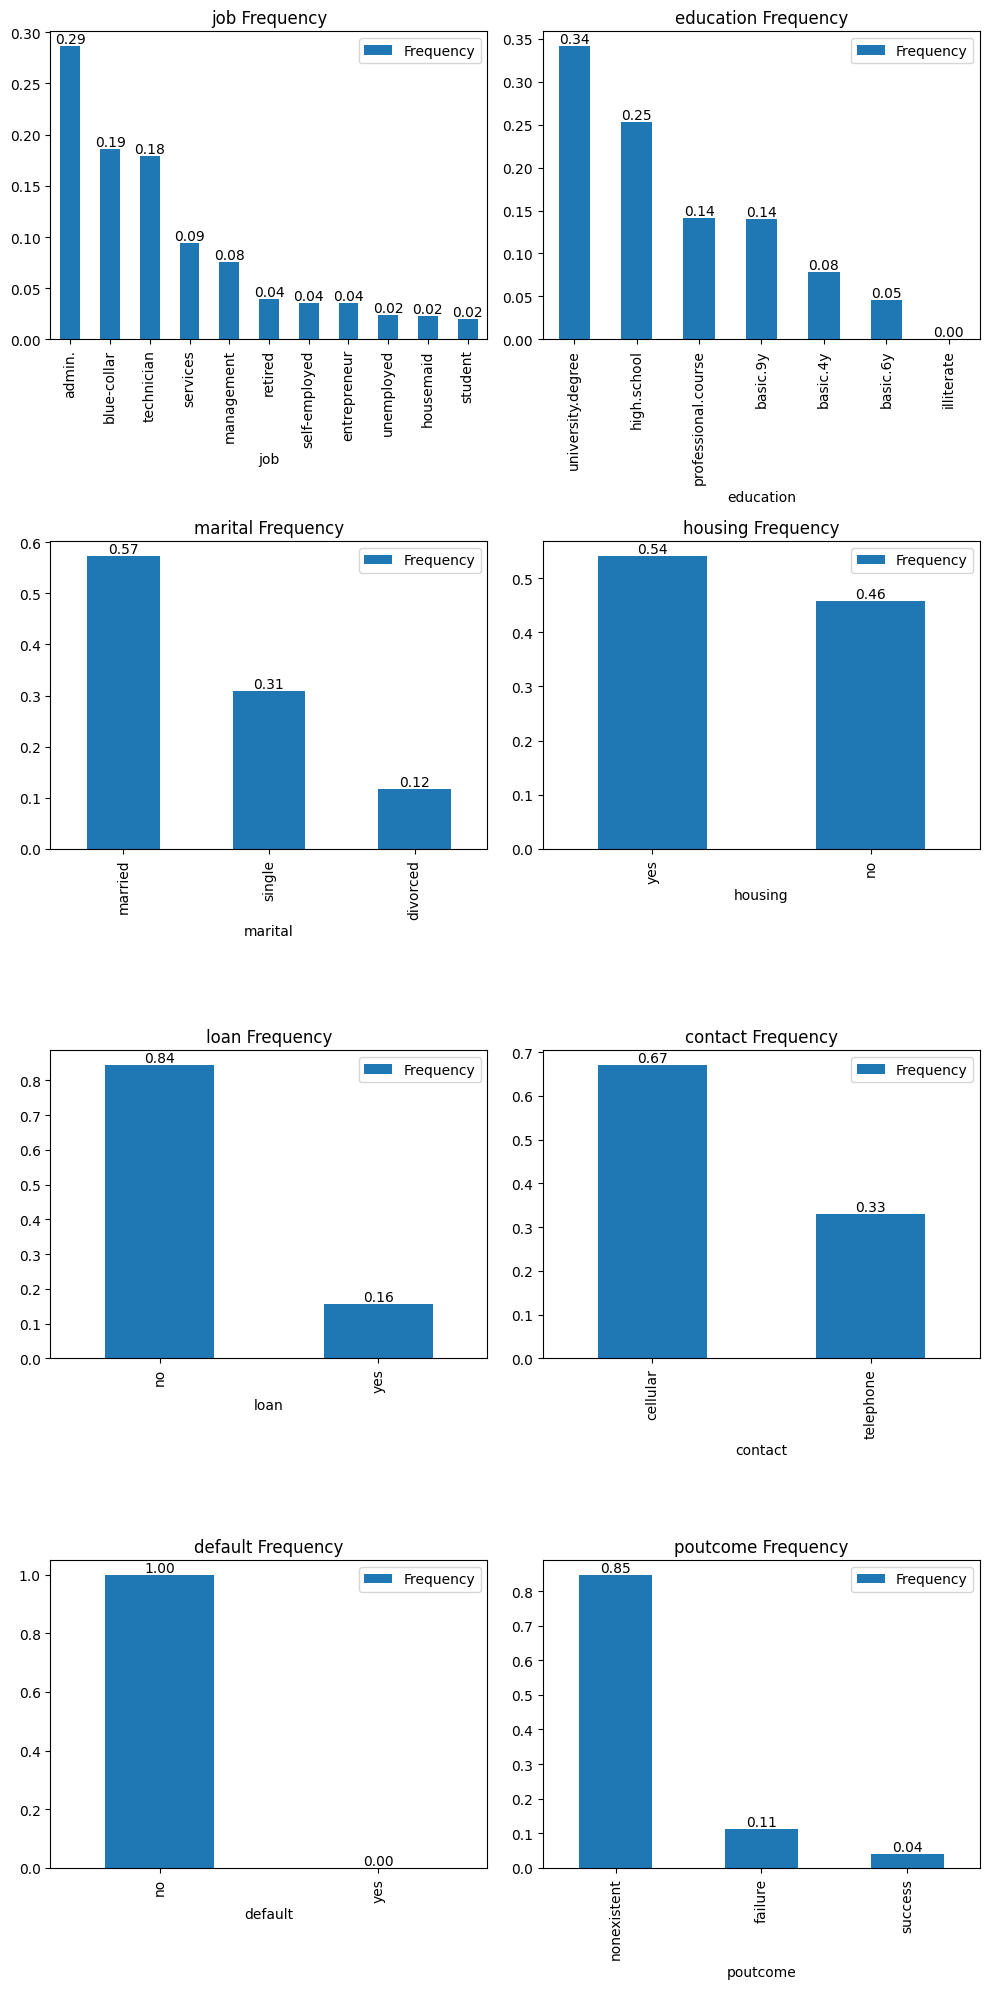

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20)) # Crea una figura y una cuadrícula de subtramas

columns = ["job", "education", "marital", "housing",
           "loan", "contact", "default", "poutcome"] # Define las columnas a graficar

for i, col in enumerate(columns):  # Itera sobre cada columna
    counts = df[col].value_counts(normalize=True).reset_index() # Calcula la frecuencia de valores
    counts.columns = [col, 'Frequency']  # Renombra las columnas del DataFrame resultante
    ax = counts.plot(x=col, y='Frequency', kind='bar',
                     ax=axs[i//2, i%2], title=f'{col} Frequency') # Crea un gráfico de barras
    ax.bar_label(ax.containers[0], label_type='edge',
                 labels=[f'{x:.2f}' for x in counts['Frequency']]) # Agrega etiquetas a las barras

plt.tight_layout() # Ajusta los parámetros de la subtrama para que encajen bien en la figura
plt.show() # Muestra la figura

### **Estadística bivariada**
En la sección de estadística bivariada, se presentarán estadísticas descriptivas para explorar las relaciones entre pares de variables en el conjunto de datos. La estadística bivariada se utiliza para resumir y describir la información contenida en dos variables y para detectar patrones y tendencias en su relación.

---
*   **Analisis de Histogramas**

En esta parte, se utilizarán histogramas para visualizar la distribución de las variables en el conjunto de datos por separado para cada valor de la variable objetivo “y”. Esto permitirá comparar las distribuciones de las variables para los clientes que han suscrito un depósito a plazo y para los que no lo han hecho y detectar posibles diferencias entre estos dos grupos. Tambien se muestra el promedio de los dos grupos de cada valor de la variable objetivo “y”, representado por las lineas verticales.

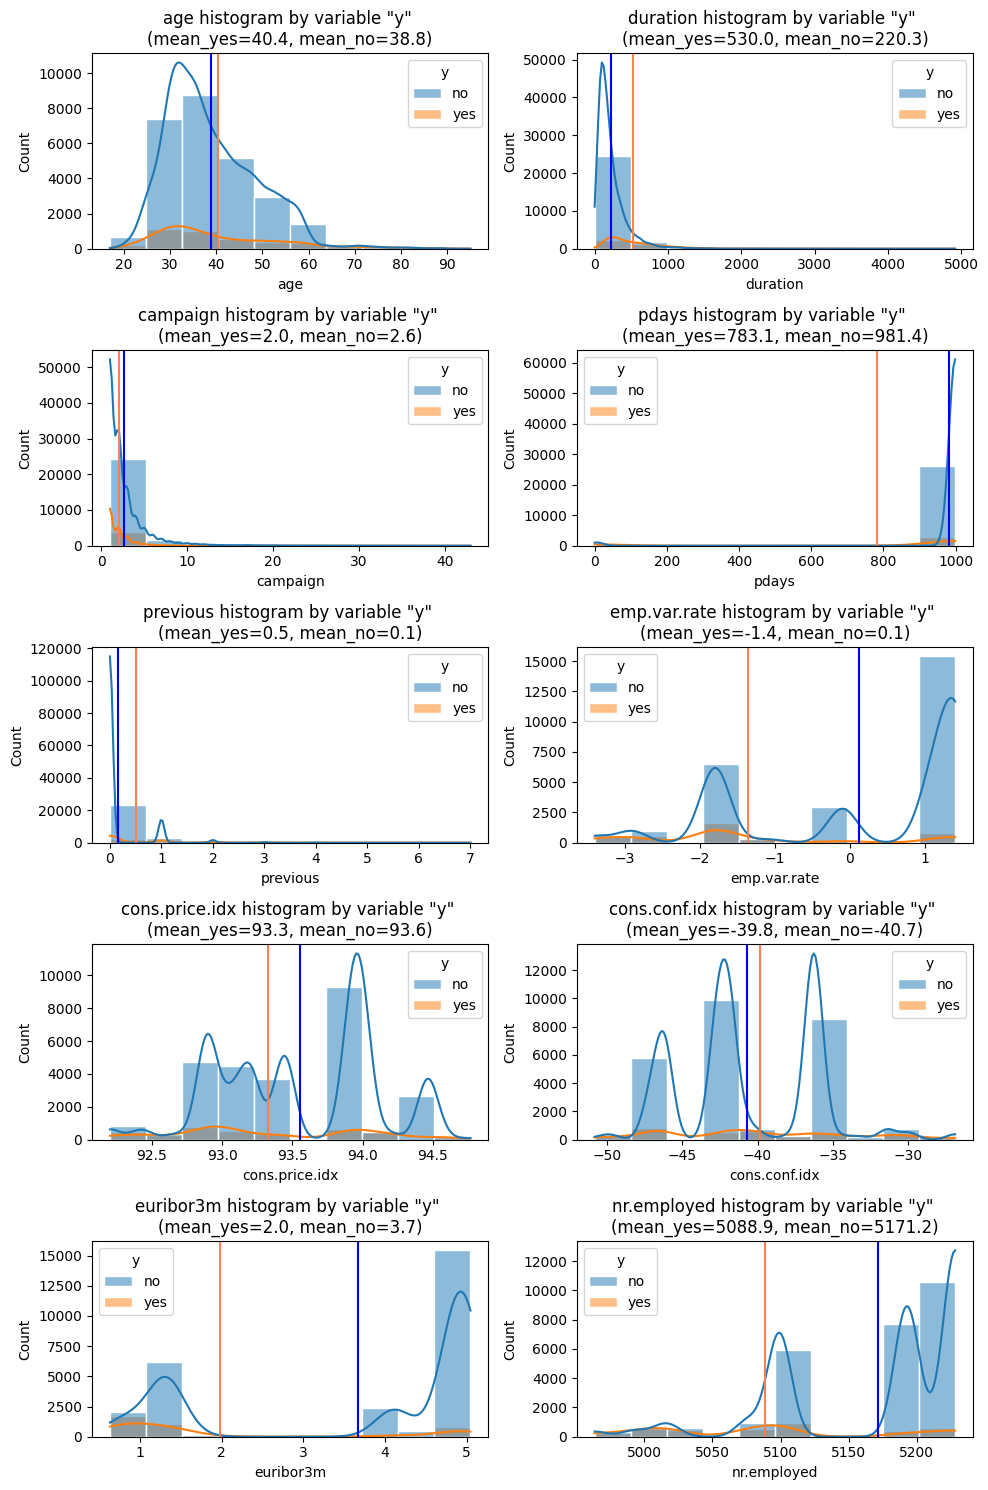

In [ ]:
columns = df.select_dtypes(include='number').columns # Selecciona solo las columnas numéricas
n = len(columns) # Calcula el número de columnas
ncols = 2 # Número de columnas en la cuadrícula de subtramas
nrows = 5 # Número de filas en la cuadrícula de subtramas

fig, axs = plt.subplots(nrows, ncols, figsize=(10, 15)) # Crea una figura y una cuadrícula de subtramas

for i, col in enumerate(columns): # Itera sobre cada columna
    row = i // ncols  # Calcula el índice de fila para la subtrama actual
    col = i % ncols  # Calcula el índice de columna para la subtrama actual
    ax = sns.histplot(data=df, x=df[columns[i]],hue="y", bins=10,  kde=True, alpha=0.5, edgecolor='white',
                      ax=axs[row, col]) # Crea un histograma para cada columna agrupado por la variable "y"
    mean_yes = df[df["y"] == "yes"][columns[i]].mean() # Calcula la media para cada columna cuando "y" es "yes"
    mean_no = df[df["y"] == "no"][columns[i]].mean() # Calcula la media para cada columna cuando "y" es "no"
    ax.axvline(mean_yes, color='coral') # Agrega una línea vertical en la media cuando "y" es "yes"
    ax.axvline(mean_no, color='blue') # Agrega una línea vertical en la media cuando "y" es "no"
    title = f'{columns[i]} histogram by variable "y" \n(mean_yes={mean_yes:.1f}, mean_no={mean_no:.1f})' # Crea un título para la subtrama
    ax.set_title(title) # Establece el título para la subtrama


plt.tight_layout() # Ajusta los parámetros de la subtrama para que encajen bien en la figura
plt.show() # Muestra la figura

*   **Analisis de Boxplot**

Se presentan boxplots de las variables de entrada por la variable objetivo “y”, donde “y” indica si el cliente ha suscrito un depósito a plazo o no. Los boxplots son gráficos que muestran la distribución de una variable numérica. Esta información es útil para entender cómo las variables están relacionadas con la variable objetivo y descubrir outliers. Esto permite detectar posibles diferencias entre estos dos grupos, los clientes que han suscrito un depósito a plazo y los que no lo han hecho.

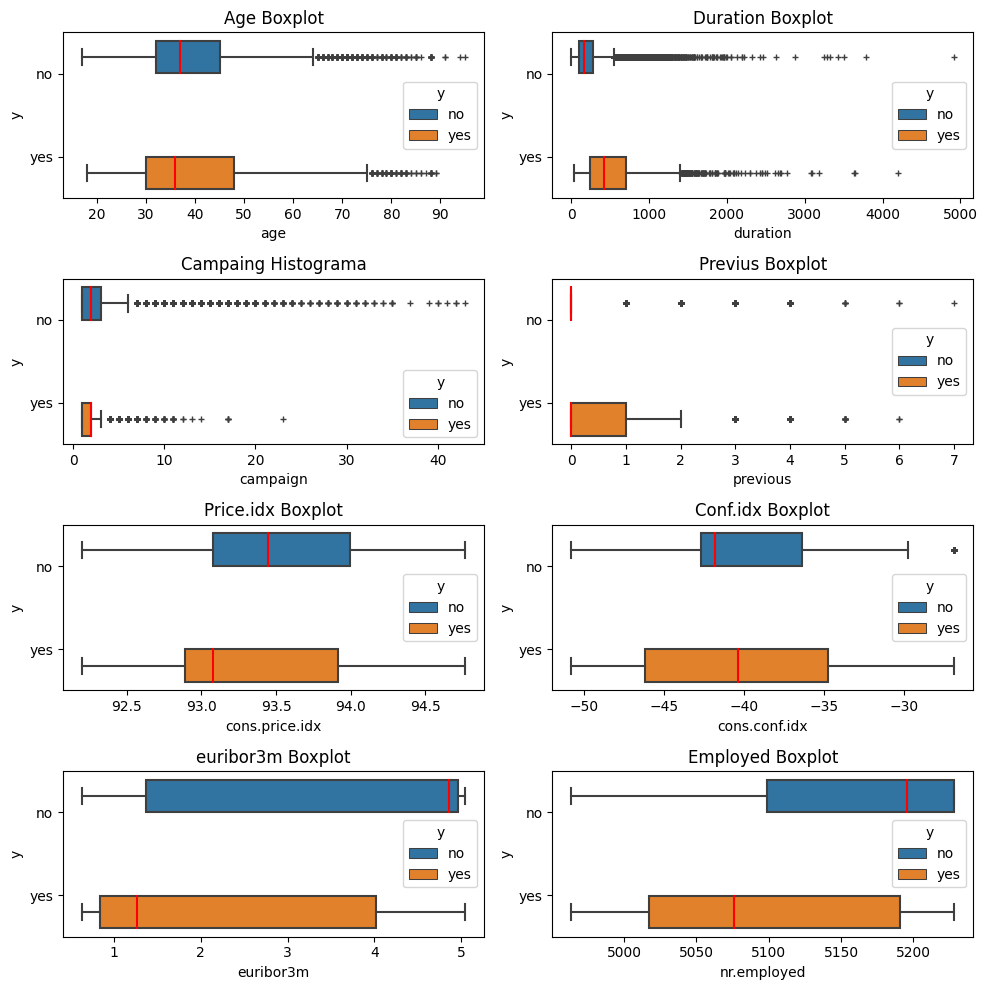

In [ ]:
columns = ["age", "duration", "campaign", "previous", "cons.price.idx",
           "cons.conf.idx", "euribor3m", "nr.employed"] # Define las columnas a graficar
titles = ['Age Boxplot', 'Duration Boxplot', 'Campaing Histograma', 'Previus Boxplot', 'Price.idx Boxplot',
          'Conf.idx Boxplot', "euribor3m Boxplot",  'Employed Boxplot'] # Define los títulos para cada subtrama

fig, axs = plt.subplots(4, 2, figsize=(10, 10)) # Crea una figura y una cuadrícula de subtramas

for i, (col, title) in enumerate(zip(columns, titles)): # Itera sobre cada columna y título
    row = i // 2  # Calcula el índice de fila para la subtrama actual
    col_index = i % 2  # Calcula el índice de columna para la subtrama actual
    ax = sns.boxplot(data=df, x=col, y = "y", hue ="y", flierprops={"marker": "+"},
                     medianprops={"color": "red"}, ax=axs[row, col_index]) # Crea un boxplot para cada columna agrupado por la variable "y"
    ax.set_title(titles[i]) # Establece el título para la subtrama

plt.tight_layout() # Ajusta los parámetros de la subtrama para que encajen bien en la figura

plt.show() # Muestra la figura

*   **Visualizaciones de Volumen**

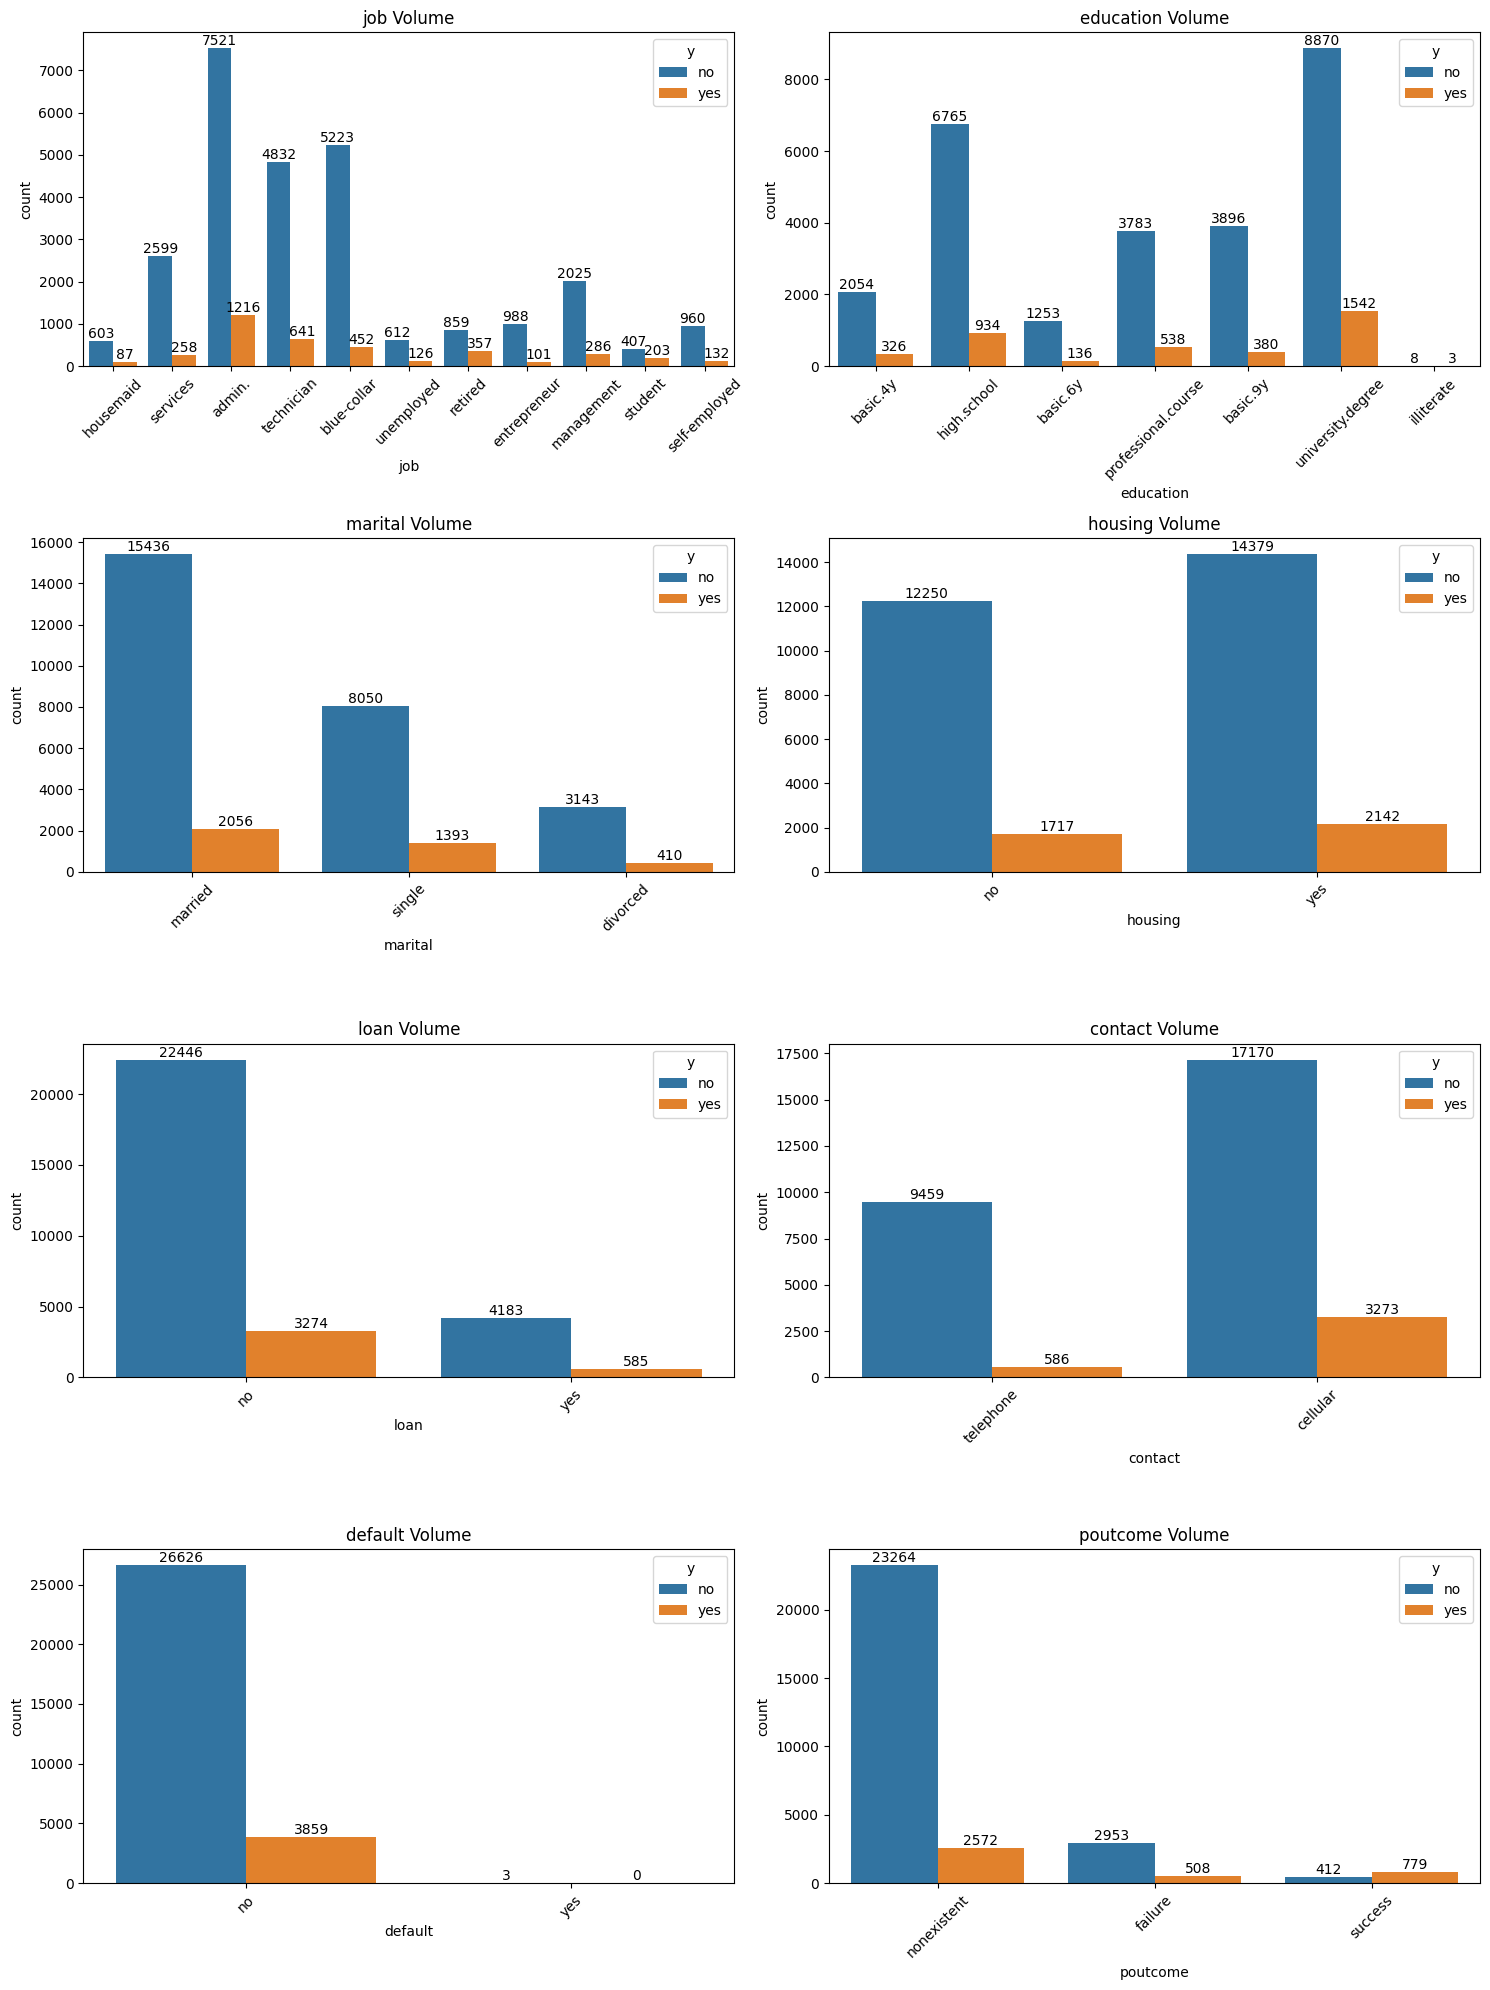

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20)) # Crea una figura y una cuadrícula de subtramas

columns = ["job", "education", "marital", "housing", "loan",
           "contact", "default", "poutcome"] # Define las columnas a graficar

for i, col in enumerate(columns): # Itera sobre cada columna
    ax = sns.countplot(data=df, x=col, hue="y", ax=axs[i//2, i%2]) # Crea un gráfico de barras para cada columna agrupado por la variable "y"
    ax.set_title(f'{col} Volume') # Establece el título para la subtrama
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rota las etiquetas del eje x
    ax.bar_label(ax.containers[0]) # Agrega etiquetas a las barras
    ax.bar_label(ax.containers[1]) # Agrega etiquetas a las barras

plt.tight_layout() # Ajusta los parámetros de la subtrama para que encajen bien en la figura
plt.show() # Muestra la figura

*   **Visualizaciones de Frecuencia**

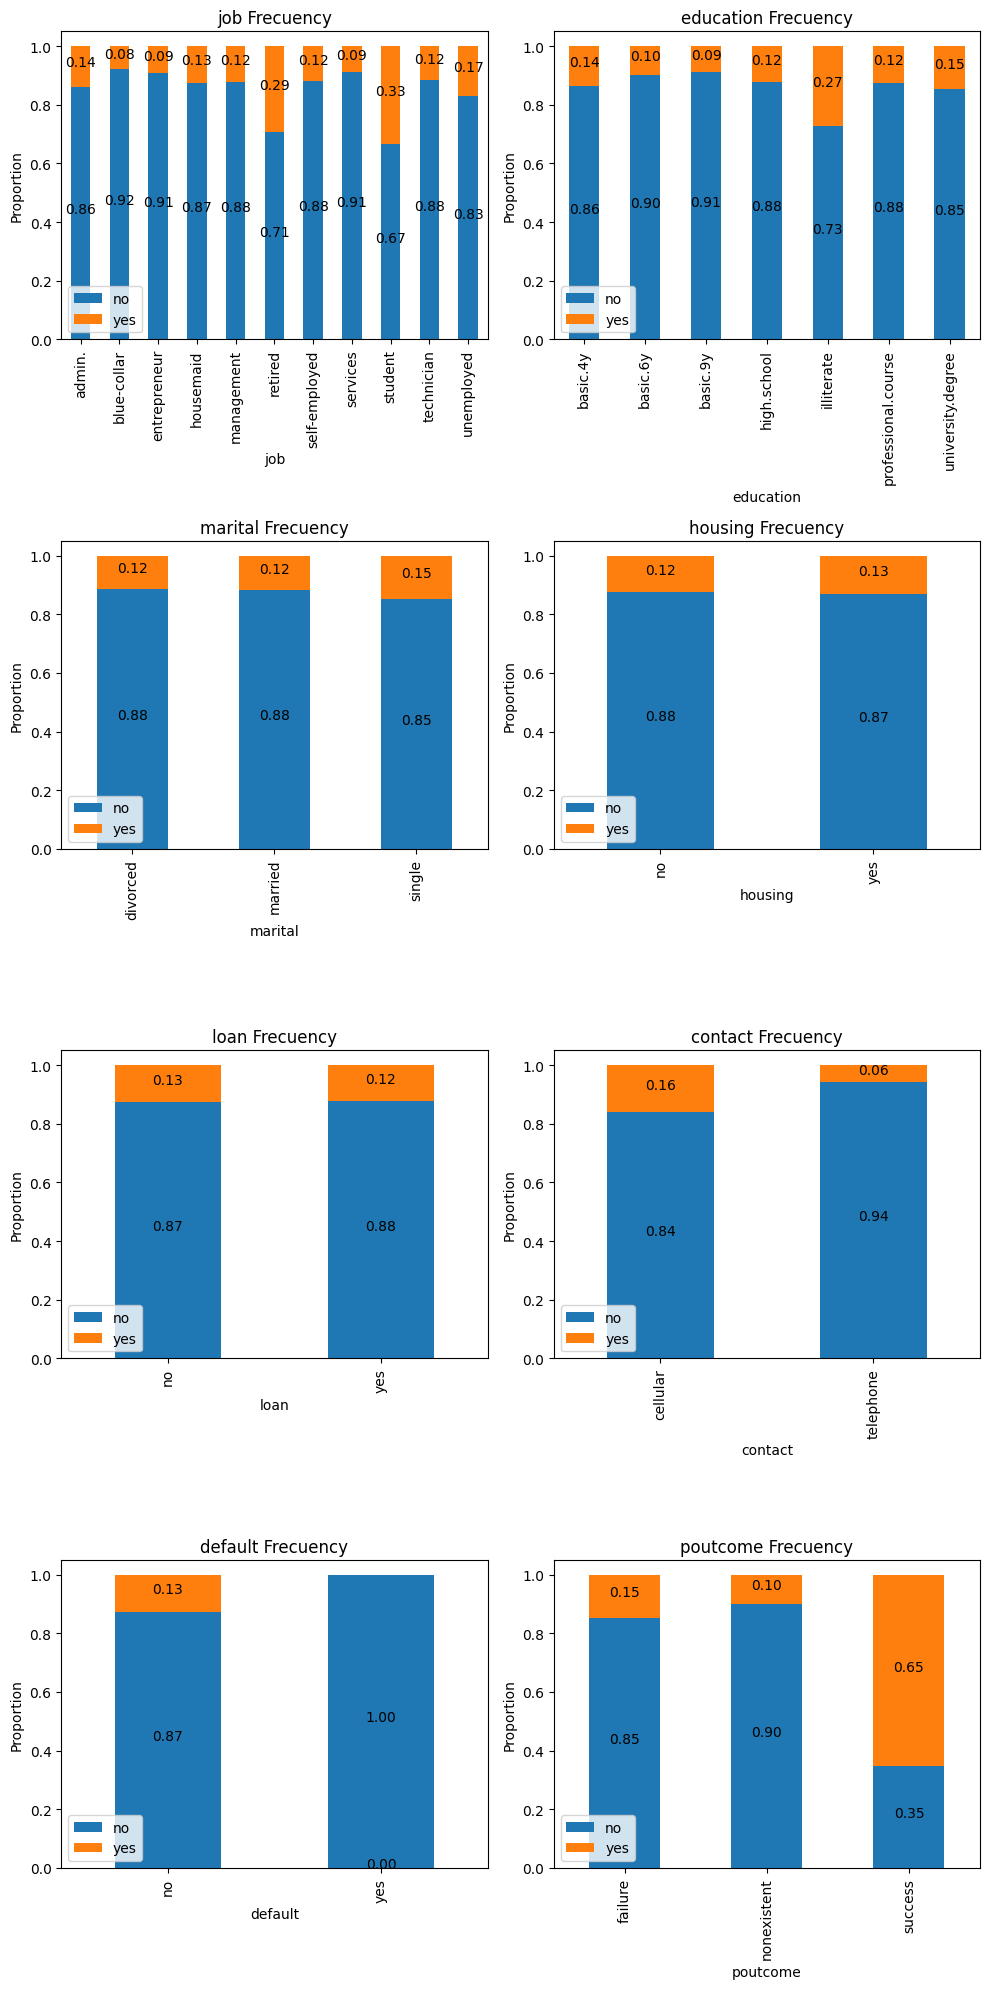

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20)) # Crea una figura y una cuadrícula de subtramas

columns = ["job", "education", "marital", "housing", "loan",
           "contact", "default", "poutcome"] # Define las columnas a graficar

for i, col in enumerate(columns): # Itera sobre cada columna
    cross_tab_prop = pd.crosstab(index=df[col],
                                 columns=df['y'],
                                 normalize="index") # Calcula la frecuencia de valores para cada columna agrupado por la variable "y"

    ax = cross_tab_prop.plot(kind='bar',
                        stacked=True,
                        ax=axs[i//2, i%2]) # Crea un gráfico de barras apiladas
    ax.legend(loc="lower left") # Agrega una leyenda
    ax.set_ylabel("Proportion") # Establece la etiqueta del eje y
    ax.set_title(f'{col} Frecuency') # Establece el título para la subtrama

    for p in ax.patches: # Itera sobre cada barra en el gráfico
        width = p.get_width() # Obtiene el ancho de la barra
        height = p.get_height() # Obtiene la altura de la barra
        x, y = p.get_xy() # Obtiene las coordenadas de la barra
        ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center') # Agrega una etiqueta con el valor de la barra

plt.tight_layout() # Ajusta los parámetros de la subtrama para que encajen bien en la figura
plt.show() # Muestra la figura

*   **Correlacion variables numericas**

<Axes: title={'center': 'Correlación entre variables'}>

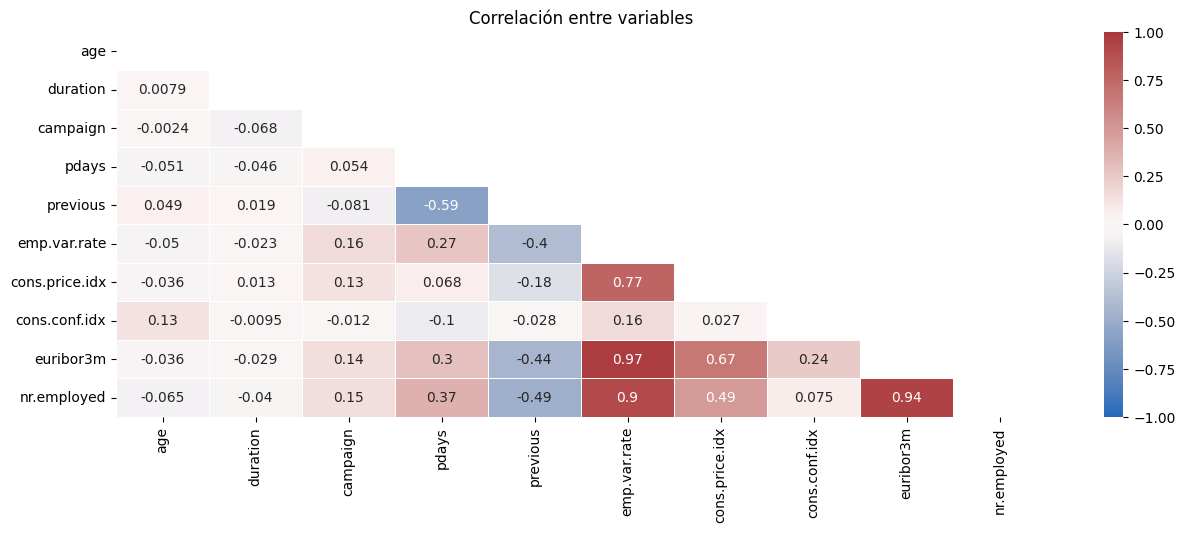

In [ ]:
columns = df.select_dtypes(include='number')

mask = np.triu(np.ones_like(columns.corr(), dtype=bool)) # Crear una máscara para solo mostrar el triangulo inferior

plt.figure(figsize=(15, 5))
plt.title('Correlación entre variables')
sns.heatmap(columns.corr(), vmin=-1, vmax=1, annot=True, linewidth=.5, cmap="vlag", mask=mask)

*   **Correlacion de todas las variables**

Para incorporar las variables categoricas no se uso el metodo de variables dummies debido a que hay muchas variables categoricas con muchos valores unicos, por lo que genera un amplio **heatmap**. Por lo tanto se hace codificacion de etiquetas (Label Encoding). Este metodo asigna un valor numérico único a cada categoría distinta en una variable cualitativa. Por ejemplo, si una variable tiene tres categorías: “rojo”, “verde” y “azul”, se les asignarían valores numéricos como 0, 1 y 2 respectivamente.

In [ ]:
# Se hace una copia del dataframe sin Label Encoding
df_NOencoded = df.copy()

# Se hace dataframe con Label Encoding
df_encoded = df.copy()

In [ ]:
# Importamos LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Crea un objeto LabelEncoder
le = LabelEncoder()

# Aplica la codificación de etiquetas a las columnas categóricas
categorical_columns = ["y", "job", "education", "marital", "housing", "loan", "contact",
                       "default", "poutcome", "month", "day_of_week"] # Define las columnas categóricas
for col in categorical_columns: # Itera sobre cada columna categórica
    df_encoded[col] = le.fit_transform(df_encoded[col]) # Aplica la codificación de etiquetas en cada columna

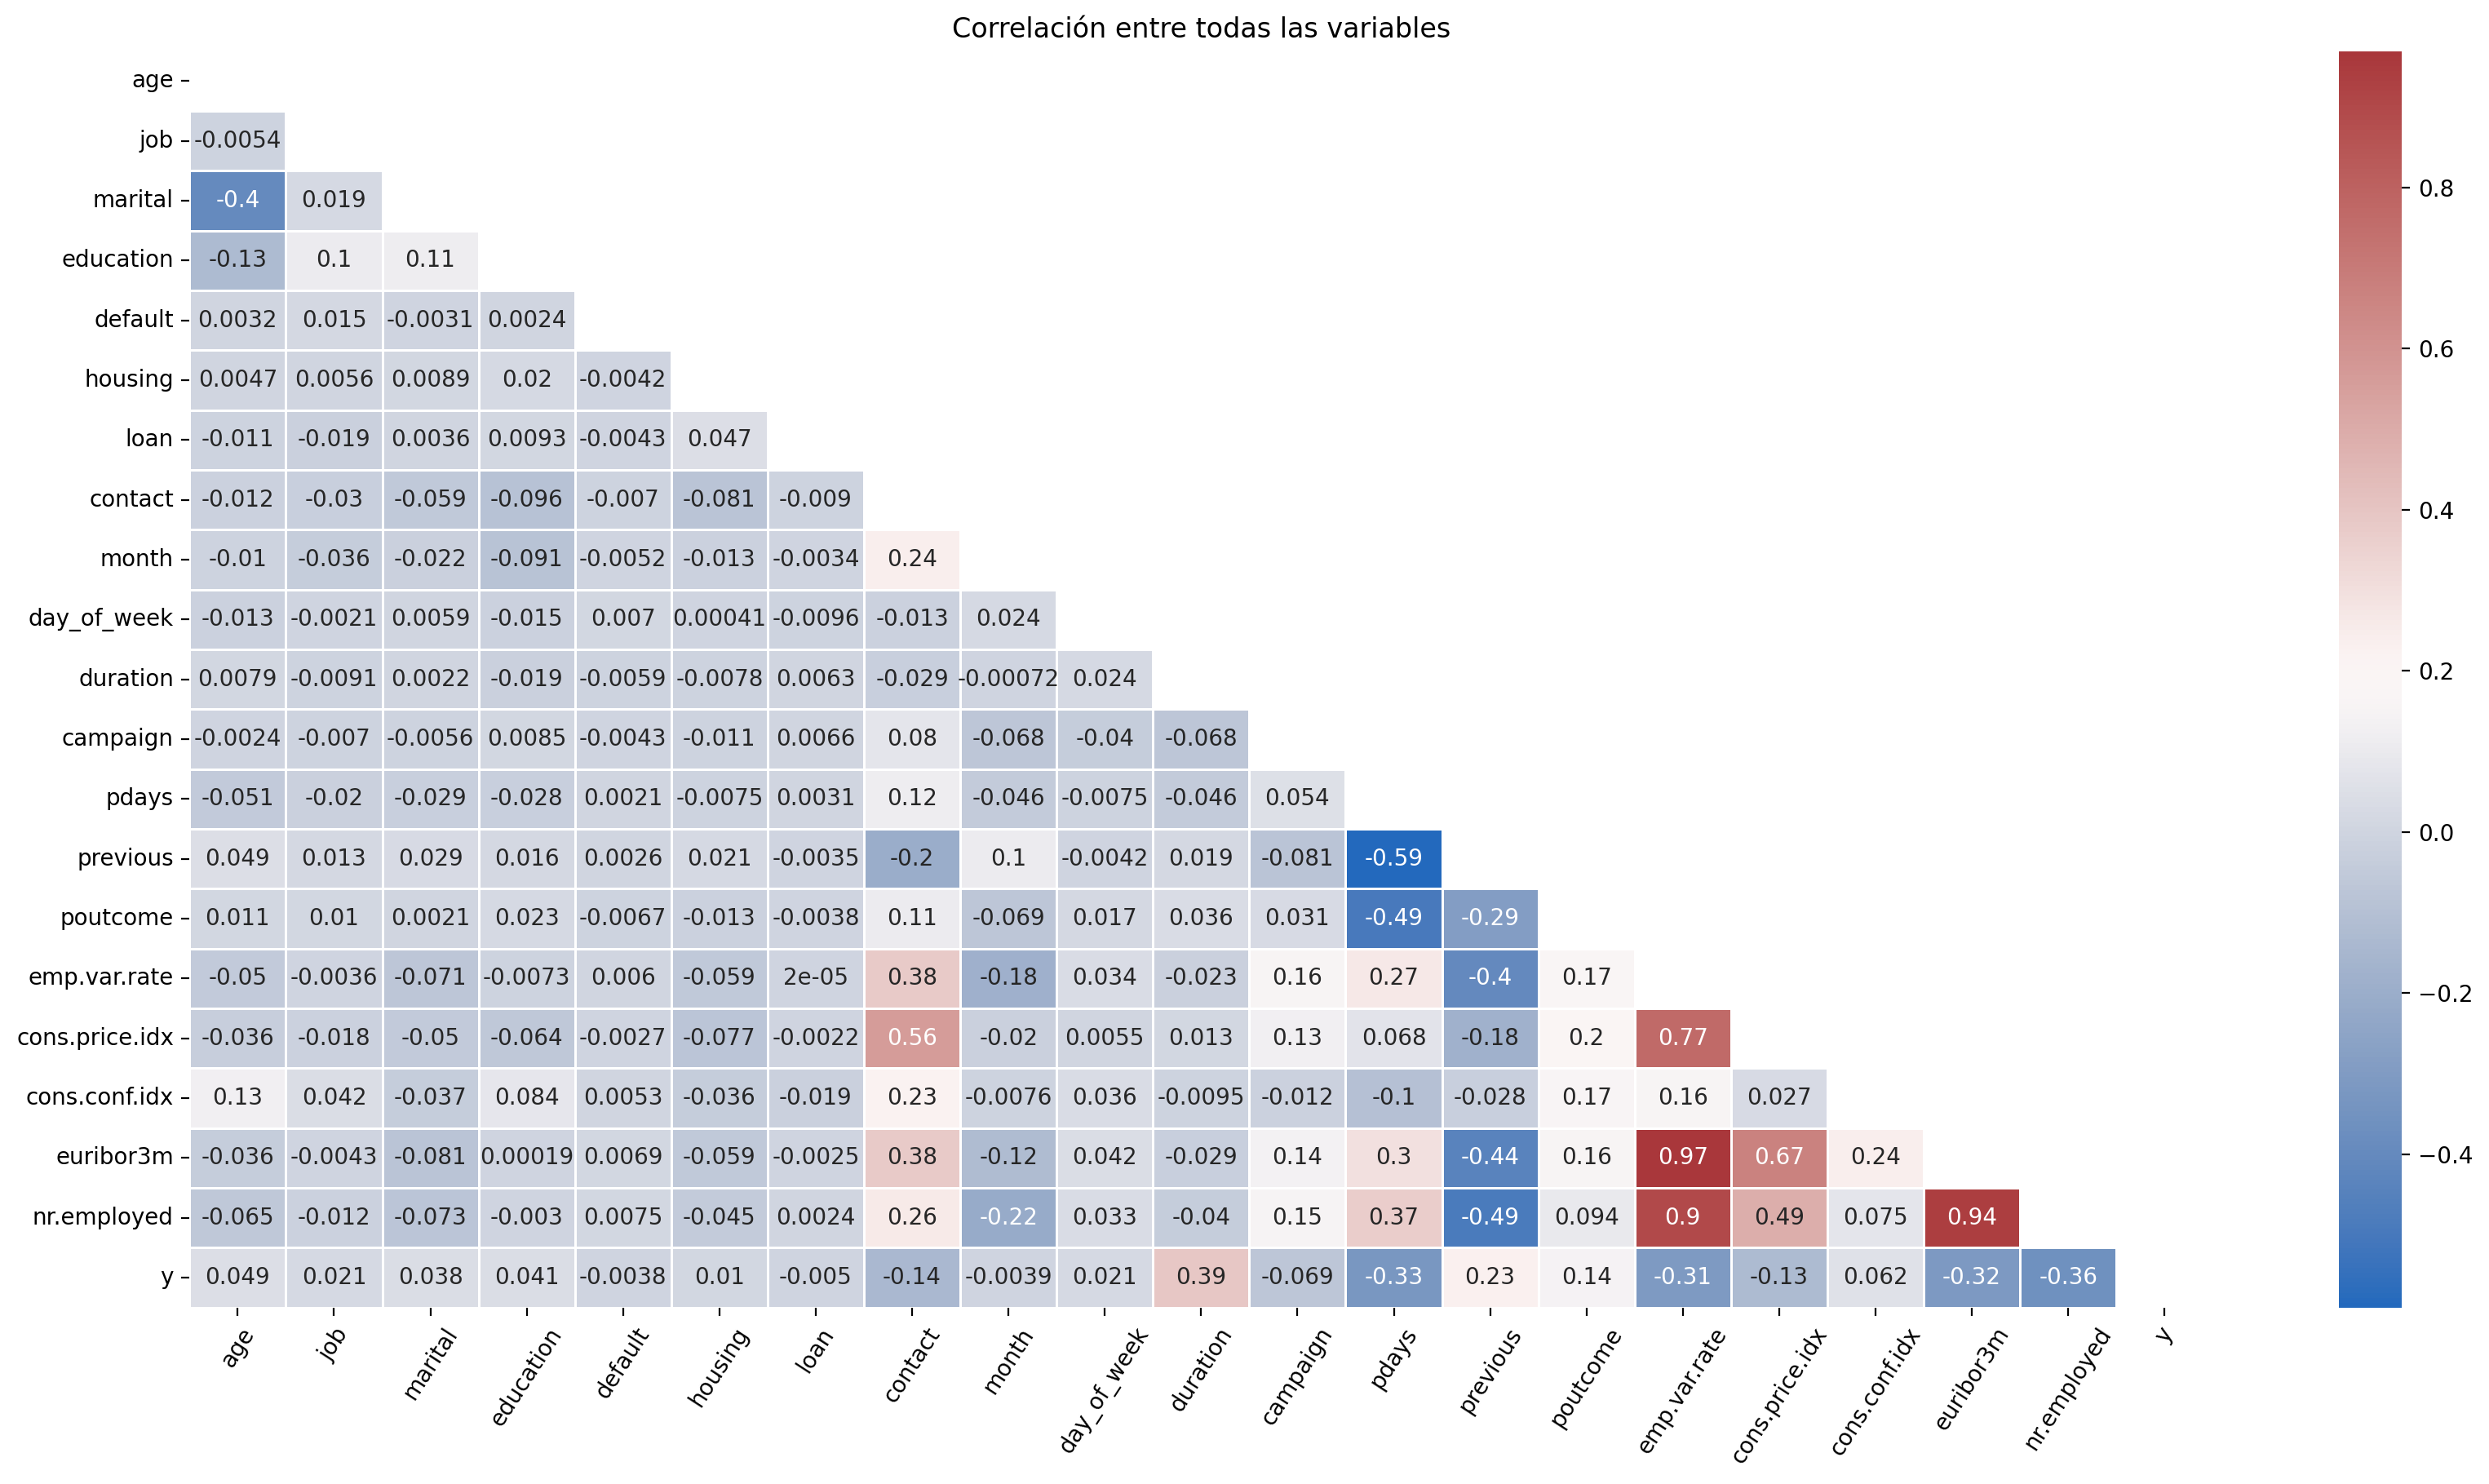

In [ ]:
plt.figure(figsize=(20, 10),dpi=200) # dpi significa “dots per inch” (puntos por pulgada). Se refiere a la resolución de una imagen. Un valor más alto produce mayor resolución
plt.title('Correlación entre todas las variables')

mask = np.triu(np.ones_like(df_encoded.corr(), dtype=bool)) # Crear una máscara para solo mostrar el triangulo inferior

sns.heatmap(df_encoded.corr(),lw=1,cmap='vlag', annot= True, mask=mask)
plt.xticks(rotation=57)
plt.yticks(rotation = 0)
plt.show()
corr_matrix = df.corr()
#print(corr_matrix)

## **Estadística inferencial**<a name="id4"></a>
En esta parte del notebook vamos a asumir que los datos provienen de una muestra representativa, esto permitira realizar la estadística inferencial, en la cual se presentarán intervalos de confianza y pruebas de hipótesis para hacer inferencias sobre la población a partir de la muestra de datos.


*   **Intervalos de confianza**

In [ ]:
columns = df.select_dtypes(include='number').columns # Selecciona solo las columnas numéricas

results = pd.DataFrame(columns=['Lower_Limit', 'Upper_Limit']) # DataFrame para almacenar los resultados

for col in columns: # Itera sobre cada columna numérica
    ci = sm.stats.DescrStatsW(df[col]).zconfint_mean() # Calcula el intervalo de confianza para la media de cada columna
    results.loc[col] = ci # Almacena el resultado en el DataFrame

results = results.style.format("{:.2f}") # Formatea los resultados como números de dos decimales

results # Muestra los resultados

,Lower_Limit,Upper_Limit
age,38.91,39.15
duration,256.55,262.42
campaign,2.49,2.55
pdays,954.07,958.59
previous,0.19,0.20
emp.var.rate,-0.09,-0.05
cons.price.idx,93.52,93.53
cons.conf.idx,-40.66,-40.55
euribor3m,3.44,3.48
nr.employed,5159.97,5161.66


Según los intervalos de confianza, parece que los datos para las variables edad, duración, campaña, pdays, anterior, tasa de variación del empleo, índice de precios al consumidor, índice de confianza del consumidor, euribor3m y número de empleados están relativamente agrupados alrededor de sus respectivas medias. Esto se indica por los rangos relativamente pequeños de los intervalos de confianza.

Por ejemplo, el intervalo de confianza para la variable edad varía de 38.91 a 39.15, lo que indica que los datos para esta variable están estrechamente agrupados alrededor de su media. De manera similar, el intervalo de confianza para la variable duración varía de 256.55 a 262.42, lo que indica que los datos para esta variable también están estrechamente agrupados alrededor de su media.

1. **Intervalo de confianza para una proporcion:** El objetivo de esta seccion es demostrar la construccion de intervalos de confianza para una proporcion. Para ello usaremos la libreria statsmodels. Estudiaremos los intervalos de confianza (IC) de las proporciones de las dos poblaciones de la variable objetivo "y".

In [ ]:
# una proporcion
n = len(df)
yesDeposito = df.y == "yes"  # segmentamos la poblacion de interes
p = yesDeposito.sum()
print(n,p)

ci_low, ci_upp = sm.stats.proportion_confint(p, n, alpha=0.05)
print(f"Poblacion que Si tiene deposito a plazo  \n su intervalo de confianza del 95% es \n({ci_low:.2f}, {ci_upp:.2f})")

30488 3859
Poblacion que Si tiene deposito a plazo  
 su intervalo de confianza del 95% es 
(0.12, 0.13)


In [ ]:
# una proporcion
n = len(df)
noDeposito = df.y == "no"  # segmentamos la poblacion de interes
p = noDeposito.sum()
print(n,p)

ci_low, ci_upp = sm.stats.proportion_confint(p, n, alpha=0.05)
print(f"Poblacion que No tiene deposito a plazo  \n su intervalo de confianza del 95% es \n({ci_low:.2f}, {ci_upp:.2f})")

30488 26629
Poblacion que No tiene deposito a plazo  
 su intervalo de confianza del 95% es 
(0.87, 0.88)


2. **Intervalo de confianza de medias:** para lograrlo nos preguntaremos ¿Cual es el promedio de edad de los clientes que no poseen depósito a plazo y los que si poseen?

In [ ]:
# Cruzamos variables para obtener su media, std y su size
df.groupby("y").agg(
{"age": [np.mean, np.std, np.size]})

age                  
          mean        std   size
y                               
no   38.838334   9.773415  26629
yes  40.352682  13.510657   3859

In [ ]:
# prueba para medias
sem_no = 9.773 / np.sqrt(26629)
sem_yes = 13.511 / np.sqrt(3859)
#print(sem_no, sem_yes)

lcb_yes = 40.35 - 1.96 * 13.511 / np.sqrt(3859)
ucb_yes = 40.35 + 1.96 * 13.511/ np.sqrt(3859)
print(f"a) El límite inferior del intervalo de confianza para 'y = sí' \n es {lcb_yes:.4f} \n y el límite superior del intervalo de confianza para 'sí' \n es {ucb_yes:.4f}.")

lcb_no = 38.84 - 1.96 * 9.773 / np.sqrt(26629)
ucb_no = 38.84 + 1.96 * 9.773/ np.sqrt(26629)
print(f"b) El límite inferior del intervalo de confianza para 'y= no' \n es {lcb_no:.4f} \n y el límite superior del intervalo de confianza para 'no' \n es {ucb_no:.4f}.")

a) El límite inferior del intervalo de confianza para 'y = sí' 
 es 39.9237 
 y el límite superior del intervalo de confianza para 'sí' 
 es 40.7763.
b) El límite inferior del intervalo de confianza para 'y= no' 
 es 38.7226 
 y el límite superior del intervalo de confianza para 'no' 
 es 38.9574.


3. **Intervalo de confianza de diferencia en medias:** ¿Los clientes que no poseen depósito a plazo tienen una edad promedio diferente a quienes si poseen?

In [ ]:
# diferencia en medias
sem_diff = np.sqrt(sem_no**2 + sem_yes**2)
#print(sem_diff)

age_diff = 40.35 - 38.84
lcb = age_diff - 2*sem_diff
ucb = age_diff + 2*sem_diff
print(f"El límite inferior del intervalo de confianza para la diferencia en edades \n es {lcb:.4f} \n y el límite superior del intervalo de confianza para la diferencia en edades \n es {ucb:.4f}.")
print("El intervalo no incluye el valor de cero, \n es posible que las medias sean diferentes")

El límite inferior del intervalo de confianza para la diferencia en edades 
 es 1.0588 
 y el límite superior del intervalo de confianza para la diferencia en edades 
 es 1.9612.
El intervalo no incluye el valor de cero, 
 es posible que las medias sean diferentes


4. **Intervalo de confianza para dos proporciones independientes:** calculamos los intervalos de confianza del 95 % para las proporciones de consumidores que tienen préstamo personal de los que tienen y no tienen depósito a plazo fijo.

In [ ]:
dz = df.groupby(df.y).agg({"loan": [lambda x: np.mean(x=="yes"), np.size]})
dz.columns = ["Proportion", "Total_n"]
print(dz)

p = dz.Proportion.no
n = dz.Total_n.no
se_no = np.sqrt(p * (1 - p) / n)
#print(se_no)

     Proportion  Total_n
y                       
no     0.157084    26629
yes    0.151594     3859


In [ ]:
p = dz.Proportion.yes
n = dz["Total_n"].yes
se_yes = np.sqrt(p * (1 - p) / n)
print(se_yes)

0.005773047126221142


In [ ]:
p = dz.Proportion.no
n = dz.Total_n.no
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)
print(lcb, ucb)

0.15271382058478647 0.16145494279348535


In [ ]:
p = dz.Proportion.yes
n = dz.Total_n.yes
lcb = p - 1.96 * np.sqrt(p * (1 - p) / n)
ucb = p + 1.96 * np.sqrt(p * (1 - p) / n)
print(lcb, ucb)

0.14027850475103104 0.1629088494858179


Podemos simplicar nuestro trabajo si hacemos uso de la libreria statsmodels. Comprobamos que obtenemos los mismos resultados.

In [ ]:
pd.crosstab(df.loan, df.y)

y,no,yes
loan,,
no,22446,3274
yes,4183,585


In [ ]:
# IC del 95 % para la proporción de clientes que no tienen deposito fijo y que tienen credito personal (Loan)
sm.stats.proportion_confint(4183, 26629)

(0.15271390089487238, 0.16145486248339944)

In [ ]:
# IC del 95 % para la proporción de clientes que tienen deposito fijo y que tienen credito personal (Loan)
sm.stats.proportion_confint(585, 3859)

(0.14027871266997857, 0.16290864156687038)

Intervalo de confianza para dos proporciones independientes

In [ ]:
se_diff = np.sqrt(se_no**2 + se_yes**2)
# print(se_diff)

d = dz.Proportion.no - dz.Proportion.yes
lcb = d - 2*se_diff
ucb = d + 2*se_diff

print(f"El límite inferior del intervalo de confianza para la diferencia en proporciones \n es {lcb:.4f} \n y el límite superior del intervalo de confianza para la diferencia en proporciones \n es {ucb:.4f}.")
print("Dado que el intervalo incluye cero, es posible que no haya diferencia entre estas dos poblaciones, \nlo que significa que el número de usuarios que tienen préstamos es similar entre los clientes que tienen depósitos fijos y los que no.")

El límite inferior del intervalo de confianza para la diferencia en proporciones 
 es -0.0069 
 y el límite superior del intervalo de confianza para la diferencia en proporciones 
 es 0.0179.
Dado que el intervalo incluye cero, es posible que no haya diferencia entre estas dos poblaciones, 
lo que significa que el número de usuarios que tienen préstamos es similar entre los clientes que tienen depósitos fijos y los que no.


*   **Prueba de hipotesis**

La prueba de hipotesis es una herramienta fundamental para determinar cual podria ser el valor de un parametro.



1.   **Hipotesis:** Se desea saber si hay una relación entre la edad y la probabilidad de suscribirse a un depósito a plazo Por lo tanto se construye una prueba de hipotesis para diferencia en medias.

**Population**: Clientes

**Parameter of Interest**: $\mu_1, \mu_2$ Edad promedio. Donde
$\mu_1$ es edad promedio de clientes que tienen depósito a plazo $\mu_2$ edad promedio de quienes no tienen depósito a plazo.

**Null Hypothesis:** $\mu_1 = \mu_2$

**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

In [ ]:
#Filtramos y creamos objetos
Yes = df[df["y"] == "yes"]
No = df[df["y"] == "no"]

n1 = len(Yes)
mu1 = Yes["age"].mean()
sd1 = Yes["age"].std()

n2 = len(No)
mu2 = No["age"].mean()
sd2 = No["age"].std()

# corremos la prueba con statsmodels
test, p_value = sm.stats.ztest(Yes["age"], No["age"])

print(f"Con una prueba estadistica del {test:.4f}")
print(f"y un valor p del {p_value:.7f}")
if p_value < 0.05:
    print("Hay evidencia suficiente para rechazar la hipotesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipotesis.")

Con una prueba estadistica del 8.5180
y un valor p del 0.0000000
Hay evidencia suficiente para rechazar la hipotesis nula.


2.   **Hipotesis:** ¿Hay una relación entre la poblacion que tiene préstamo personal (loan) y la probabilidad de suscribirse a un depósito a plazo?

**Population**: Clientes

**Parameter of Interest**: $p_1, p_2$ Propociones. Donde
$p_1$ proporción de clientes que tienen depósito a plazo con crédito personal,  $p_2$ proporción de clientes quienes no tienen depósito a plazo con crédito personal.

**Null Hypothesis:** $p_1 = p_2$

**Alternative Hypthosis:** $p_1 \neq p_2$

In [ ]:
pd.crosstab(df.loan, df.y)

y,no,yes
loan,,
no,22446,3274
yes,4183,585


In [ ]:
successes = np.array([4183, 585])  # número de éxitos (loan = yes) en cada grupo
totals = np.array([26629, 3859])  # tamaño de muestra en cada grupo

stat, p_value = sm.stats.proportions_ztest(successes, totals)

print(f"Con una prueba estadistica del {stat:.4f}")
print(f"y un valor p del {p_value:.3f}")
if p_value < 0.05:
    print("Hay evidencia suficiente para rechazar la hipotesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipotesis nula.")

Con una prueba estadistica del 0.8776
y un valor p del 0.380
No hay suficiente evidencia para rechazar la hipotesis nula.


 ## **Analisis PCA Principal Component Analysis**<a name="id5"></a>
 En la sección de análisis PCA, se aplicará el análisis de componentes principales para reducir la dimensionalidad del conjunto de datos y seleccionar las características más importantes. El análisis PCA es una técnica de reducción de dimensionalidad que se utiliza para transformar un conjunto de datos con muchas variables en un conjunto de datos con menos variables, manteniendo la mayor cantidad de información posible.

Vamos a eliminar la variable **duration** del análisis PCA y de la Construcción de Modelos, debido a una importante nota que nos da la fuente de este dataset, la cuál indica que la variable **duration** afecta en gran medida a la variable objetivo (por ejemplo, si duración=0 entonces y='no'). Por lo tanto, **duration** solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

In [ ]:
# Preprocesamiento de los datos
X = df_encoded.drop(['y','duration'], axis=1)
y = df_encoded['y']

In [ ]:
# Hacemos el split en segmento train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Para que el PCA funcione mejor se normalizan los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Con este comando aplicamos PCA
from sklearn.decomposition import PCA
pca = PCA()
#X_pca = pca.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# El análisis de la varianza explicada para cada componente nos indica que el 95% es explicado por las primeras 14 variables
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.21705696, 0.08898065, 0.0790813 , 0.06982209, 0.05842761,
       0.05538276, 0.05452236, 0.05328454, 0.05202793, 0.04978036,
       0.04887967, 0.04848512, 0.04211418, 0.03229792, 0.02960718,
       0.01511025, 0.00369881, 0.00106664, 0.00037367])

In [ ]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('El número de dimensiones requeridas para \npreservar el 90% de la varianza es',dim)

El número de dimensiones requeridas para 
preservar el 90% de la varianza es 13


La siguiente visualizacion consiste en un gráfico de línea que muestra la varianza explicada acumulada por el número de componentes principales en un Análisis de Componentes Principales (PCA) previamente ajustado, es decir cómo aumenta la varianza explicada a medida que se agregan más componentes principales.

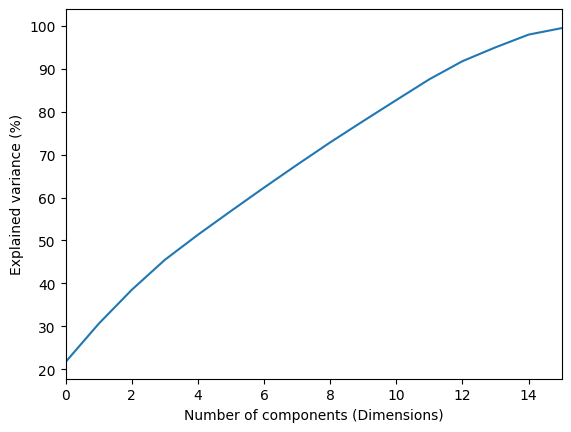

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100)) # Crea un gráfico de línea de la varianza explicada acumulada
plt.xlim(0,15,1) # Establece el límite del eje x
plt.xlabel("Number of components (Dimensions)") # Establece la etiqueta del eje x
plt.ylabel("Explained variance (%)") # Establece la etiqueta del eje y
plt.show() # Muestra el gráfico

In [ ]:
components_ = X.columns[0:13]
comp_df_b = pd.DataFrame(list(zip(components_, pca.explained_variance_ratio_ * 100)), columns=['Componentes', 'Contribucion'])

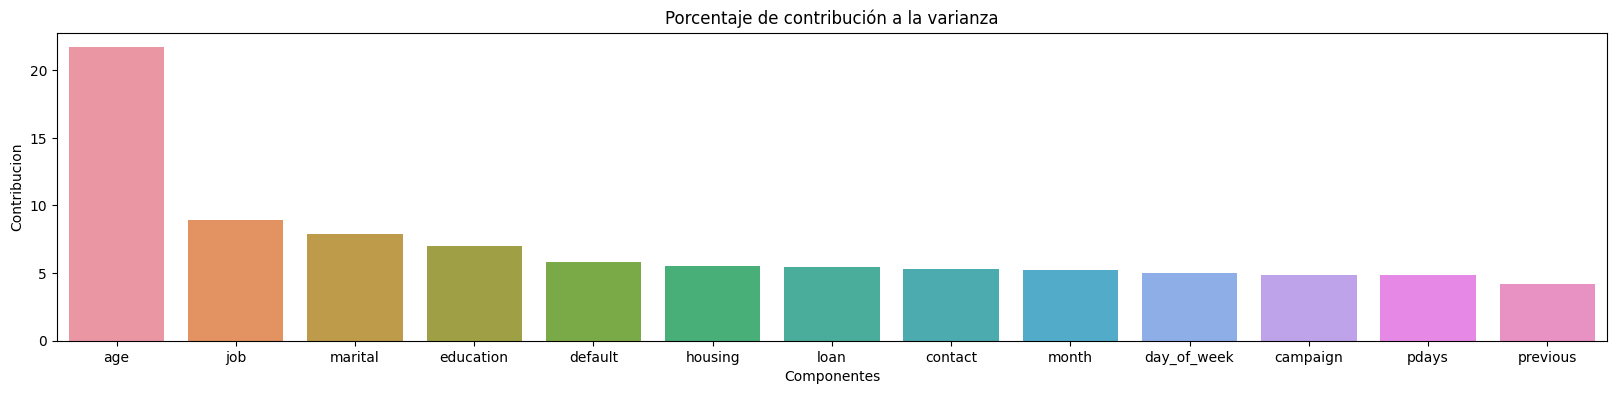

In [ ]:
plt.figure(figsize=(20, 4))
sns.barplot(
 data=comp_df_b,
 x="Componentes",
 y="Contribucion");
plt.title("Porcentaje de contribución a la varianza")
plt.show()

El siguiente código aplica el Análisis de Componentes Principales (PCA) a un conjunto de datos de entrenamiento X_train utilizando la clase PCA de scikit-learn. Luego, muestra una matriz de correlación para el conjunto de datos transformado.

         0         1         2         3         4         5         6   \
0 -1.870484 -0.162863 -0.564403  0.936215 -0.842029 -0.670610  0.241327   
1 -1.230168 -0.322409 -0.877645 -1.991391  0.929135  0.616355 -0.768726   
2  2.863887 -1.381243  1.746139  0.230717  0.374877  0.910539 -0.432986   
3 -1.472001  0.056631  1.643310 -0.687814 -1.212433 -0.051844  1.795184   
4  1.700325 -0.972395 -0.363945 -1.494825  0.029496  0.911555  0.900936   

         7         8         9         10        11        12        13  \
0  0.102858  0.006463 -0.840472 -0.036385  1.165388  0.416032  0.916893   
1 -0.460425  0.193156 -1.110426 -0.886862  0.781150  0.605989 -0.467902   
2  0.959253 -0.868224 -1.133080  0.021022  0.016750  0.046765 -0.136862   
3  0.014528 -0.112741  0.343082 -0.979295  0.348381  0.676605 -0.286375   
4 -0.930336  0.402124  0.140084 -1.295597 -0.677731 -0.505652  1.241916   

         14        15        16        17        18  
0  0.442464  0.812128  0.038569  0.123368  0

<Axes: title={'center': 'No hay correlación entre el conjunto de datos transformado'}>

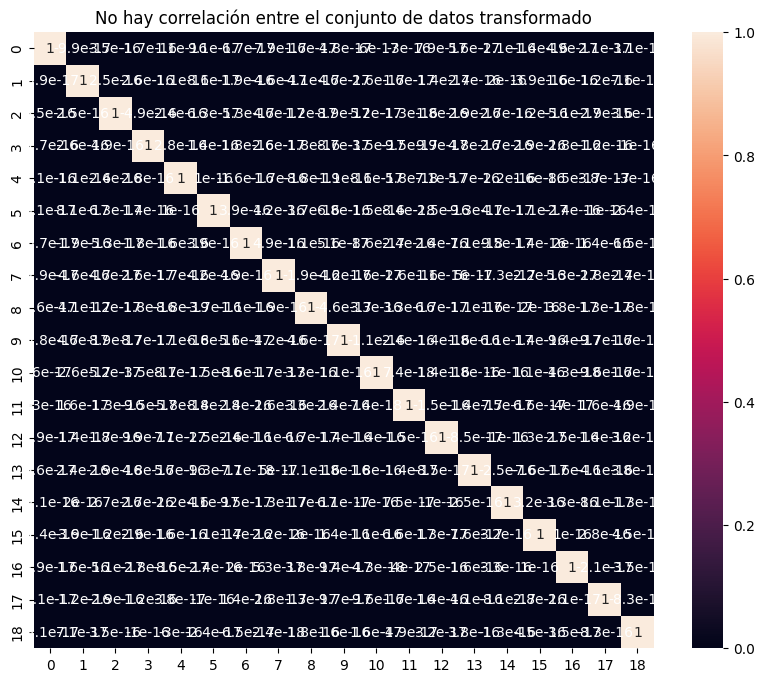

In [ ]:

pca = PCA(n_components=13) # Crea un objeto PCA con 13 componentes


# Obtiene el conjunto de datos transformado
X_pca = pd.DataFrame(X_train) # Convierte el resultado en un DataFrame
print(X_pca.head()) # Muestra las primeras filas del conjunto de datos transformado
print("\nSize: ")
print(X_pca.shape) # Muestra el tamaño del conjunto de datos transformado


fig = plt.figure(figsize=(10, 8)) # Crea una figura
plt.title('No hay correlación entre el conjunto de datos transformado')
sns.heatmap(X_pca.corr(),
            annot=True) # Muestra una matriz de correlación para el conjunto de datos transformado

 ## **Construcción de modelos predictivos de regresión logística**<a name="id6"></a>
En la sección de construcción de modelos predictivos de regresión logística, se desarrollarán modelos de regresión logística para predecir si un cliente se suscribirá a un depósito a plazo o no.

La regresión logística es una técnica de aprendizaje automático supervisado que se utiliza para modelar la relación entre una variable dependiente binaria y un conjunto de variables independientes. En esta sección, se ajustarán modelos de regresión logística utilizando todas las variables y utilizando solo las características seleccionadas por el análisis PCA.

Se evaluará el rendimiento de los modelos utilizando medidas como la precisión y la matriz de confusión y se comparará el rendimiento de los modelos para determinar cuál es el mejor enfoque. Esta información es útil para construir modelos predictivos precisos y para tomar decisiones basadas en evidencia.

**Modelo 1**. Logistic Regression con todas las variables

Logistic Regression test accuracy score 
with all the features: 0.8867

Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

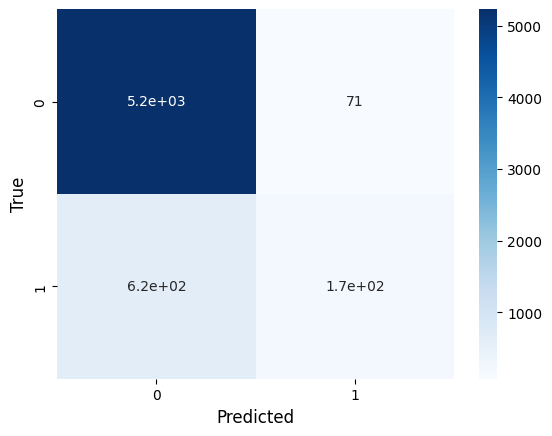

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression test accuracy score \nwith all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

**Logistic Regression con PCA**

**Modelo 2**. Logistic Regression con las primeras 14 variables

Logistic Regression test accuracy score 
with the first 14 features: 0.8796

Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

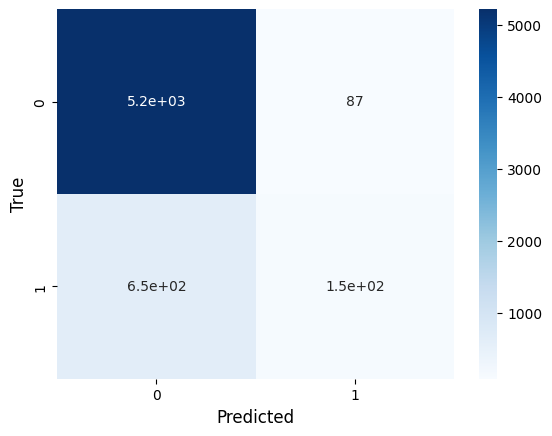

In [ ]:
X = df_encoded.drop(['y','duration','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)
y = df_encoded['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression test accuracy score \nwith the first 14 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

**Modelo 3**. Logistic Regression con las primeras 13 variables

Logistic Regression test accuracy score 
with the first 13 features: 0.8791

Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

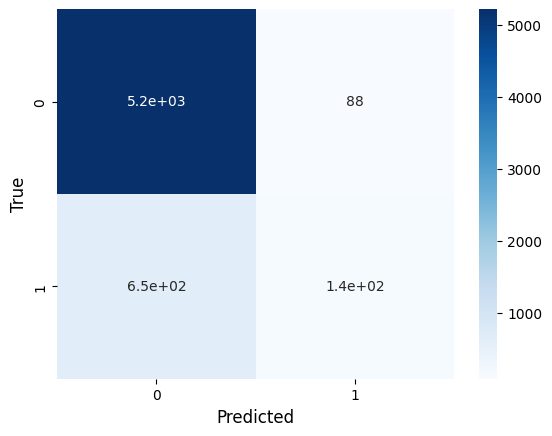

In [ ]:
X = df_encoded.drop(['y','duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'poutcome' ], axis=1)
y = df_encoded['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression test accuracy score \nwith the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

##**Conclusiones**<a name="id7"></a>
Según la estadística inferencial y las visualizaciones descriptivas, se sugiere que la edad del cliente está relacionada con la adquisición de un depósito a plazo fijo. En particular, los clientes menores de 38 años tienden a no tener depósitos a plazo, mientras que la edad no parece ser un factor determinante para aquellos que sí los tienen.

![02Captura.png](https://drive.google.com/uc?export=view&id=1yZKMOiFg5brCm8UhKjF3lDPTcgOzu3As)

En consecuencia, se podría considerar mantener la estrategia de marketing actual para el producto de depósito a plazo fijo dirigida a clientes mayores de 38 años, y desarrollar alternativas de marketing para atraer a clientes más jóvenes. Cabe destacar que, según nuestro dataset (dataset despues de tratar valores perdidos), el 57% (17,291 clientes) de los contactos fueron con clientes menores o igual a 38 años de edad, mientras que el 43% (13,197 clientes) fueron con clientes mayores a 38 años. Esto podría influir en el analisis de la relacion entre edad del cliente y la **si** adquisición o **no** adquisición de un depósito a plazo fijo.

En cuanto al modelo de regresión logística, al utilizar todas las variables, el modelo tiene una precisión del 88.67%. Al reducir el número de variables a 14, la precisión disminuye ligeramente a 87.96%. Siguiendo la sugerencia del análisis PCA y utilizando solo 13 variables, la precisión es del 87.91%.

Por otra parte, la confusion matrix para cada modelo indica la eficacia para predecir aquellos clientes que no adquirirán un depósito a plazo, pero presenta debilidades para predecir aquellos que sí lo harán.